### Here I'm trying to predict the "preliminary decision" about a book based of its reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

In [2]:
df1 = pd.read_csv('decision.csv', index_col = 0)

df1

,book_id,preliminary_decision,review
0,1,accept,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,2,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,3,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,4,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,5,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...,...,...
167,168,accept,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,169,accept,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,170,reject,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,171,accept,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [3]:
df1.preliminary_decision.value_counts()

accept             115
reject              48
probably reject      7
no decision          2
Name: preliminary_decision, dtype: int64

accept             66.86
reject             27.91
probably reject     4.07
no decision         1.16
Name: preliminary_decision, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

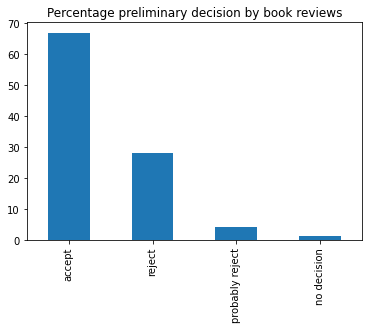

In [4]:
# Checking for the preliminary decision
print(round(df1.preliminary_decision.value_counts(normalize=True)*100, 2))
round(df1.preliminary_decision.value_counts(normalize=True)*100, 2).plot(kind='bar')
plt.title('Percentage preliminary decision by book reviews')
plt.show


In [5]:
df2 = pd.read_csv('lemma.csv', index_col = 0)

df2

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text,Lemma_text,Lemma_length
0,0,4.0,1,1,es,0,NaN,- El artículo aborda un problema contingente y...,2010-07-05,575,artículo aborda problema contingente y relevan...,artículo abordo problema contingente y relevan...,331
1,0,4.0,1,2,es,1,NaN,El artículo presenta recomendaciones prácticas...,2010-07-05,618,artículo presenta recomendaciones prácticas de...,artículo presentar recomendación práctico desa...,433
2,0,5.0,1,3,es,1,NaN,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,tema interesante y ayuda guía incorporar práct...,tema interesante y ayuda guío incorporar práct...,752
3,1,4.0,2,1,es,1,NaN,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,explica forma ordenada y didáctica experiencia...,explicar forma ordenado y didáctico experienci...,911
4,1,4.0,2,3,es,0,NaN,Los autores describen una metodología para des...,2010-07-05,1938,autores describen metodología desarrollar form...,autor describir metodología desarrollar forma ...,1178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,169,5.0,-1,1,es,-2,NaN,El trabajo pretende ofrecer una visión del uso...,2015-07-05,684,pretende ofrecer visión herramientas eva entor...,pretender ofrecer visión herramienta eva entor...,357
395,169,4.0,-1,2,es,-1,NaN,El paper está bien escrito y de fácil lectura....,2015-07-05,576,paper escrito y fácil lectura ajusta formato e...,paper escrito y fácil lectura ajusto formato e...,359
396,170,4.0,-1,1,es,0,NaN,Observación de fondo: No se presenta un ejemp...,2015-07-05,831,observación fondo presenta implementación inte...,observación fondo presentar implementación int...,469
397,170,3.0,1,2,es,-1,NaN,Se propone un procedimiento para elaborar máqu...,2015-07-05,472,propone procedimiento elaborar máquinas dispos...,proponer procedimiento elaborar máquina dispos...,292


4.0    43.16
3.0    36.05
5.0    12.11
2.0     6.84
1.0     1.84
Name: confidence, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

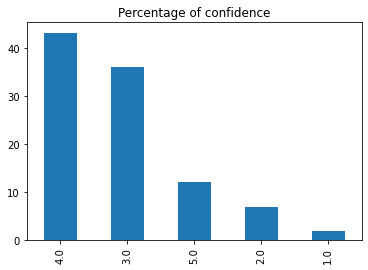

In [6]:
# Checking for the confidence
print(round(df2.confidence.value_counts(normalize=True)*100, 2))
round(df2.confidence.value_counts(normalize=True)*100, 2).plot(kind='bar')
plt.title('Percentage of confidence')
plt.show

 2    25.92
-2    22.25
 1    21.20
 0    15.45
-1    15.18
Name: evaluation, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

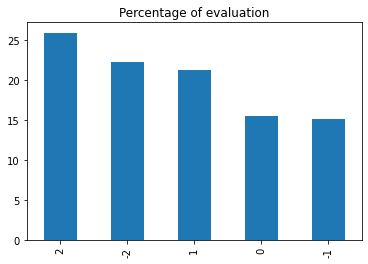

In [7]:
# Checking for the evaluation
print(round(df2.evaluation.value_counts(normalize=True)*100, 2))
round(df2.evaluation.value_counts(normalize=True)*100, 2).plot(kind='bar')
plt.title('Percentage of evaluation')
plt.show

-1    35.86
 0    27.23
 1    23.82
-2     9.16
 2     3.93
Name: orientation, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

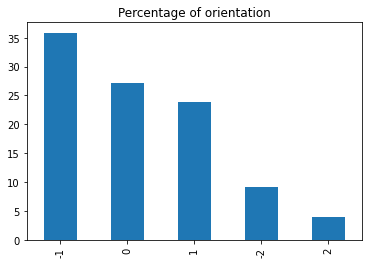

In [8]:
# Checking for the orientation
print(round(df2.orientation.value_counts(normalize=True)*100, 2))
round(df2.orientation.value_counts(normalize=True)*100, 2).plot(kind='bar')
plt.title('Percentage of orientation')
plt.show

In [9]:
# Extract 2 columns: level_0 and Lemma_text

In [10]:
df2_new = df2[['level_0','Lemma_text']]

df2_new.head()

,level_0,Lemma_text
0,0,artículo abordo problema contingente y relevan...
1,0,artículo presentar recomendación práctico desa...
2,0,tema interesante y ayuda guío incorporar práct...
3,1,explicar forma ordenado y didáctico experienci...
4,1,autor describir metodología desarrollar forma ...


In [11]:
# Checking 1st row before concatanation
df2_new['Lemma_text'][0]

'artículo abordo problema contingente y relevante e incluir diagnóstico nacional práctico solución práctico concreto lenguaje adecuado artículo sentir concatenación artículo resultado encuesta práctico seguridad incorporación práctico ordir sección reflejo orden versión revisado artículo validación tipo siquiera evaluación experto'

In [12]:
# Merge rows by same value in the column ('level_0')
d = {'Lemma_text': lambda x: ' '.join(x)}
df_new = df2_new.groupby(df2_new['level_0']).aggregate(d)
df_new.head()

,Lemma_text
level_0,
0,artículo abordo problema contingente y relevan...
1,explicar forma ordenado y didáctico experienci...
2,proponer enfocar basado apoyar recomendación r...
3,realizar modelamiento encriptación cuánticar n...
4,novedoso propuesta estructurado correctamente ...


In [13]:
# Checking if the rows are well concatenated
df_new['Lemma_text'][0]

'artículo abordo problema contingente y relevante e incluir diagnóstico nacional práctico solución práctico concreto lenguaje adecuado artículo sentir concatenación artículo resultado encuesta práctico seguridad incorporación práctico ordir sección reflejo orden versión revisado artículo validación tipo siquiera evaluación experto artículo presentar recomendación práctico desarrollo software seguro describir mejor práctica recomendado desarrollar software proactivo ataque y realizar análisis costo práctico desarrollo software basado revisión práctico propuesto bibliografío y contraste dato obtenido encuesta empresa finalmente recomendar guía ideal aplicar guía propuesto empresa involucrado encuesta servir originar él evaluar efectividad forma independiente tema interesante y ayuda guío incorporar práctica seguridad presentación descripción etapa y práctica desarrollo software seguro “ estado real desarrollo software chile ” indicar paper lograr encuesta presentar nueve tabla correspond

In [14]:
## Merge two dataframes
df_merge = pd.merge(df1, df_new, left_index=True, right_index=True)
df_merge.head()

,book_id,preliminary_decision,review,Lemma_text
0,1,accept,"[{'confidence': '4', 'evaluation': '1', 'id': ...",artículo abordo problema contingente y relevan...
1,2,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ...",explicar forma ordenado y didáctico experienci...
2,3,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ...",proponer enfocar basado apoyar recomendación r...
3,4,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ...",realizar modelamiento encriptación cuánticar n...
4,5,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ...",novedoso propuesta estructurado correctamente ...


In [15]:
# Drop review column
df_merge_drop = df_merge.drop(['review'], axis =1)
df_merge_drop.head()

,book_id,preliminary_decision,Lemma_text
0,1,accept,artículo abordo problema contingente y relevan...
1,2,accept,explicar forma ordenado y didáctico experienci...
2,3,accept,proponer enfocar basado apoyar recomendación r...
3,4,accept,realizar modelamiento encriptación cuánticar n...
4,5,accept,novedoso propuesta estructurado correctamente ...


### Model training

In [16]:
from sklearn.model_selection import train_test_split

independent_var = df_merge_drop.Lemma_text
target_var = df_merge_drop.preliminary_decision

X_train, X_test, y_train, y_test = train_test_split(independent_var, target_var, test_size=0.2, random_state = 42) 

print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

X_train:  134
X_test:  34
y_train:  134
y_test:  34


### Vectorization Feature Engineering (TF-IDF)

In [17]:
tfvec = TfidfVectorizer()
#clf = LogisticRegression(solver = "liblinear") # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LinearSVC() # This has increased the ccuracy

In [18]:
model = Pipeline([('vectorizer', tfvec), ('classifier', clf)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', LinearSVC())])

In [19]:
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)

array([[24,  1,  5],
       [ 0,  0,  0],
       [ 1,  0,  3]], dtype=int64)

### Model prediction

In [20]:
print("Accuracy: ", accuracy_score(predictions, y_test ))
print("Precision: ", precision_score(predictions, y_test, average = 'weighted' ) )
print("Recall: ", recall_score(predictions, y_test, average = 'weighted', labels=np.unique(predictions)))

Accuracy:  0.7941176470588235
Precision:  0.8911764705882352
Recall:  0.7941176470588235


In [21]:
# classification_report() builds a text report showing the main classification metrics.

print(classification_report(y_test, predictions, labels=np.unique(predictions)))


              precision    recall  f1-score   support

      accept       0.80      0.96      0.87        25
      reject       0.75      0.38      0.50         8

   micro avg       0.79      0.82      0.81        33
   macro avg       0.78      0.67      0.69        33
weighted avg       0.79      0.82      0.78        33



In [22]:
### Try a new review

review = ['su novela es una historia mágica que revela la esencia de la vida, el amor y la soledad. Debido a la simplicidad del estilo de la prosa, las ilustraciones divertidas y divertidas, la viveza de la imaginación, esta historia simple pero reveladora se considera una de las mejores obras literarias de todos los tiempos.']
result = model.predict(review)

print(result)

['accept']
